# Завдання 1
Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

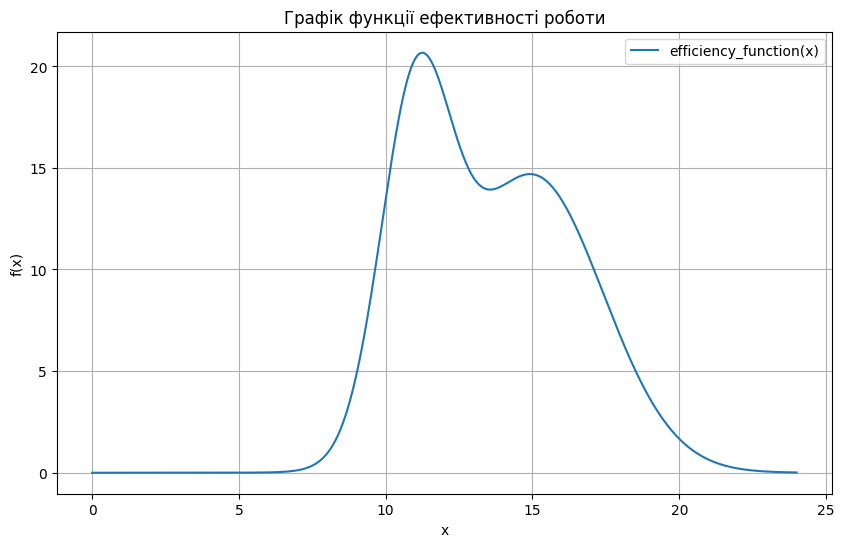

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Означення функції ефективності роботи
def efficiency_function(x):
    term1 = 2 * (4 / 1.2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 11) / 1.2)**2)
    term2 = 2 * (7 / 2.4 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 15) / 2.4)**2)
    return term1 + term2

# Визначення вектору x і відповідних значень функції y
x = np.linspace(0, 24, 400)
y = efficiency_function(x)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='efficiency_function(x)')
plt.title('Графік функції ефективності роботи')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()



In [27]:
# Означення символьної змінної
x = sp.symbols('x')

# Означення функції ефективності роботи (використовуємо ту саму, що й раніше)
def efficiency_function(x):
    term1 = 2 * (4 / 1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2)**2)
    term2 = 2 * (7 / 2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4)**2)
    return term1 + term2

# Символьне обчислення невизначеного інтегралу функції
integral_indefinite = sp.integrate(efficiency_function(x), x)
print(f'Невизначений інтеграл функції: {integral_indefinite}')

# Визначення меж інтегрування
a = 9  # початок робочого дня
b = 18  # кінець робочого дня

# Символьне обчислення визначеного інтегралу від a до b
integral_definite = sp.integrate(efficiency_function(x), (x, a, b))

# Отримання числового значення визначеного інтегралу
numerical_value = integral_definite.evalf()

print(f'Числове значення визначеного інтегралу від {a} до {b}: {numerical_value}')




Невизначений інтеграл функції: 9.89949493661167*sqrt(2)*pi*erf(0.294627825494395*x - 4.41941738241592) + 5.65685424949238*sqrt(2)*pi*erf(0.58925565098879*x - 6.48181216087669)
Числове значення визначеного інтегралу від 9 до 18: 125.988201337929


# Завдання 2
Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

Наближене значення інтегралу методом прямокутників (при 1000 прямокутниках): 125.97965124896457


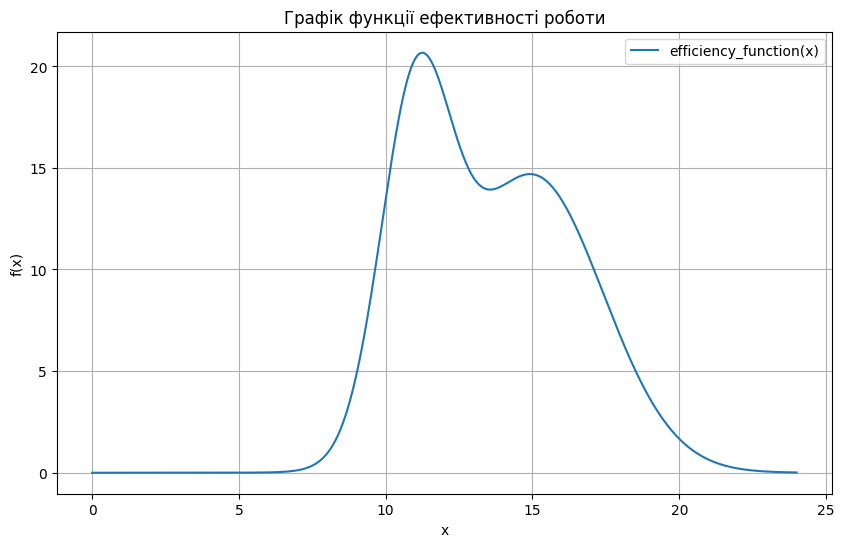

In [28]:
x = sp.Symbol('x')

# Перетворення символьного виразу на функцію, яку можна викликати
efficiency_function = sp.lambdify(x, efficiency_function_sym, 'numpy')

# Визначення функції для чисельного інтегрування методом прямокутників
def rectangular_integration(func, a, b, n):
    dx = (b - a) / n  # Ширина кожного прямокутника
    integral = 0.0
    for i in range(n):
        xi = a + i * dx  # Ліва границя поточного прямокутника
        integral += func(xi) * dx  # Площа поточного прямокутника
    return integral

# Визначення меж інтегрування
a = 9  # початок робочого дня
b = 18  # кінець робочого дня

# Кількість прямокутників для методу прямокутників
n_rectangles = 1000

# Обчислення інтегралу за допомогою методу прямокутників
approx_integral = rectangular_integration(efficiency_function, a, b, n_rectangles)
print(f'Наближене значення інтегралу методом прямокутників (при {n_rectangles} прямокутниках): {approx_integral}')

# Візуалізація функції
x_vals = np.linspace(0, 24, 400)
y_vals = efficiency_function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='efficiency_function(x)')
plt.title('Графік функції ефективності роботи')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()




# Завдання 3
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [29]:
def trapezoidal_integration(func, a, b, n):
    """Чисельне інтегрування методом трапецій.

    Parameters:
    func (callable): Функція, яку треба інтегрувати.
    a, b (float): Межі інтегрування.
    n (int): Кількість підінтервалів.

    Returns:
    float: Значення наближеного інтегралу.

    """
    dx = (b - a) / n  # Ширина кожного підінтервалу
    integral = 0.5 * (func(a) + func(b))  # Початкове значення інтегралу

    # Сумуємо значення функції на кожному підінтервалі (від a+dx до b-dx)
    for i in range(1, n):
        integral += func(a + i * dx)

    # Завершуємо обчислення, множимо на dx і отримуємо остаточне значення інтегралу
    integral *= dx
    return integral

# Кількість підінтервалів для методу трапецій
n_trapezoids = 1000

# Обчислення інтегралу за допомогою методу трапецій
approx_integral = trapezoidal_integration(efficiency_function, a, b, n_trapezoids)
print(f'Наближене значення інтегралу методом трапецій (при {n_trapezoids} трапеціях): {approx_integral}')




Наближене значення інтегралу методом трапецій (при 1000 трапеціях): 125.98813422097996


# Завдання 4
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [30]:
def simpson_integration(func, a, b, n):
    """Чисельне інтегрування методом Сімпсона.

    Parameters:
    func (callable): Функція, яку треба інтегрувати.
    a, b (float): Межі інтегрування.
    n (int): Кількість підінтервалів (повинна бути парною).

    Returns:
    float: Значення наближеного інтегралу.

    """
    if n % 2 != 0:
        raise ValueError("Кількість підінтервалів n повинна бути парною.")

    dx = (b - a) / n  # Ширина кожного підінтервалу
    x = np.linspace(a, b, n+1)  # Точки для обчислення значень функції

    # Значення функції в обчисленних точках
    y = func(x)

    # Обчислення інтегралу за допомогою методу Сімпсона
    integral = dx / 3 * np.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])

    return integral

# Кількість підінтервалів для методу Сімпсона (повинна бути парною)
n_simpson = 100

# Обчислення інтегралу за допомогою методу Сімпсона
approx_integral = simpson_integration(efficiency_function, a, b, n_simpson)
print(f'Наближене значення інтегралу методом Сімпсона (при {n_simpson} підінтервалах): {approx_integral}')



Наближене значення інтегралу методом Сімпсона (при 100 підінтервалах): 125.98820183799567


# Завдання 5
Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [31]:
from scipy import integrate

# Обчислення інтегралу за допомогою функції scipy.integrate.quad
result, error = integrate.quad(efficiency_function, a, b)

print(f'Наближене значення інтегралу методом quad: {result}')
print(f'Апроксимована похибка: {error}')


Наближене значення інтегралу методом quad: 125.9882013379287
Апроксимована похибка: 7.962207575120533e-11
